# Unsupervised Learning

## Clustering

### Machine Learning Workflow
#### Let’s remember the workflow for Machine Learning

1. Problem statement.
2. Data acquisition.
3. Data organization and cleaning.
4. Exploratory data analysis.
5. Interpretation.
6. Model creation.

#### Problem statement

We are consultants for a supermarket. We are interested in knowing what type of customers are the ones who buy in the plaza. Therefore, we need to create a segmentation of them with the information of the users in the plaza.

#### Data obtention

For this excersise we are using [this link](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

#### Data organization and cleanning



In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
import seaborn as sns

<Axes: >

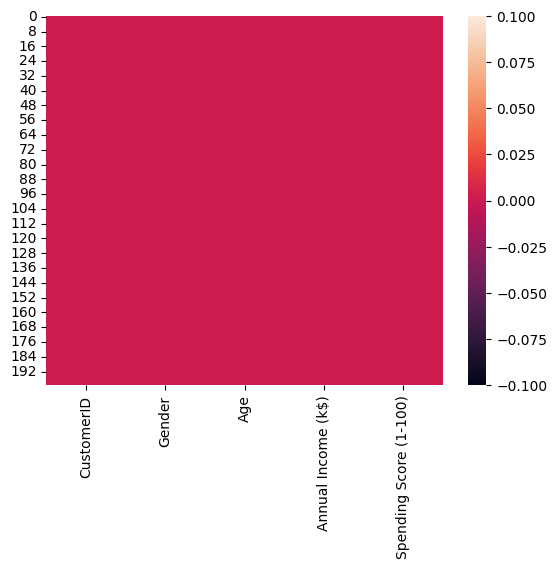

In [ ]:
sns.heatmap( df.isna() )

In [ ]:
dfd = pd.get_dummies(df, drop_first=True)

In [ ]:
dfd.drop('CustomerID', axis=1, inplace=True)

#### Exploring the data

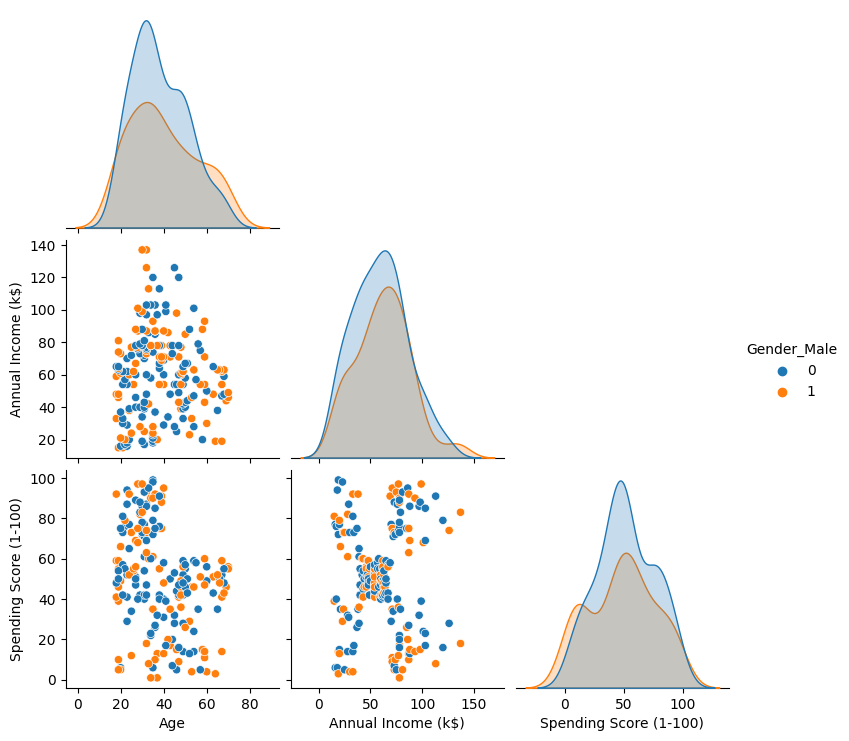

In [ ]:
sns.pairplot(dfd, hue='Gender_Male', corner=True)

<Axes: >

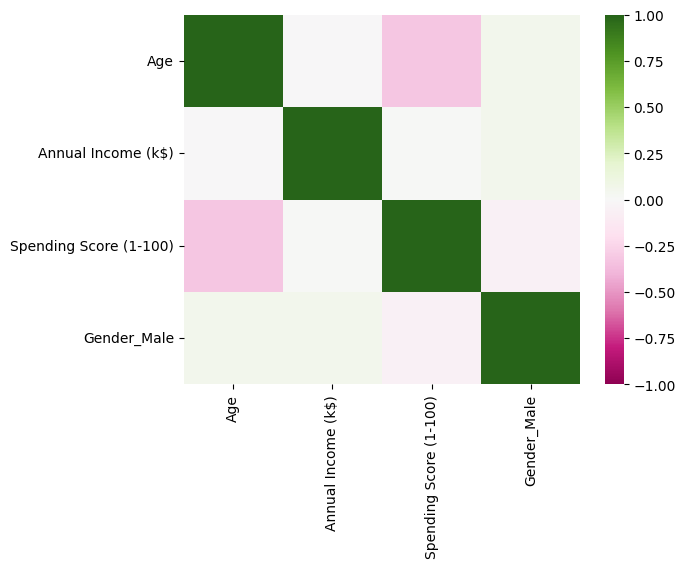

In [ ]:
sns.heatmap( dfd.corr(), cmap='PiYG', vmin=-1, vmax=1)

#### Data interpretation

It seems that there are 5 groups when comparing Annual Income with Spending Score (1-100).

#### Model Creation

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km = KMeans(n_clusters = 5)

In [ ]:
x = dfd[['Spending Score (1-100)', 'Annual Income (k$)']]

In [ ]:
km.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
y = km.predict(x)

In [ ]:
dfd['grupo'] = y

In [ ]:
dfd

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male,grupo
0,19,15,39,1,1
1,21,15,81,1,3
2,20,16,6,0,1
3,23,16,77,0,3
4,31,17,40,0,1
...,...,...,...,...,...
195,35,120,79,0,4
196,45,126,28,0,0
197,32,126,74,1,4
198,32,137,18,1,0


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

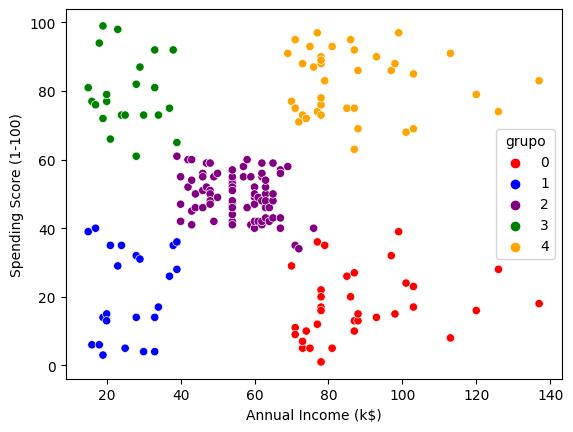

In [ ]:
sns.scatterplot(
    x=dfd['Annual Income (k$)'], 
    y=dfd['Spending Score (1-100)'], 
    hue=dfd['grupo'],
    palette = ['red', 'blue', 'purple', 'green', 'orange']
)

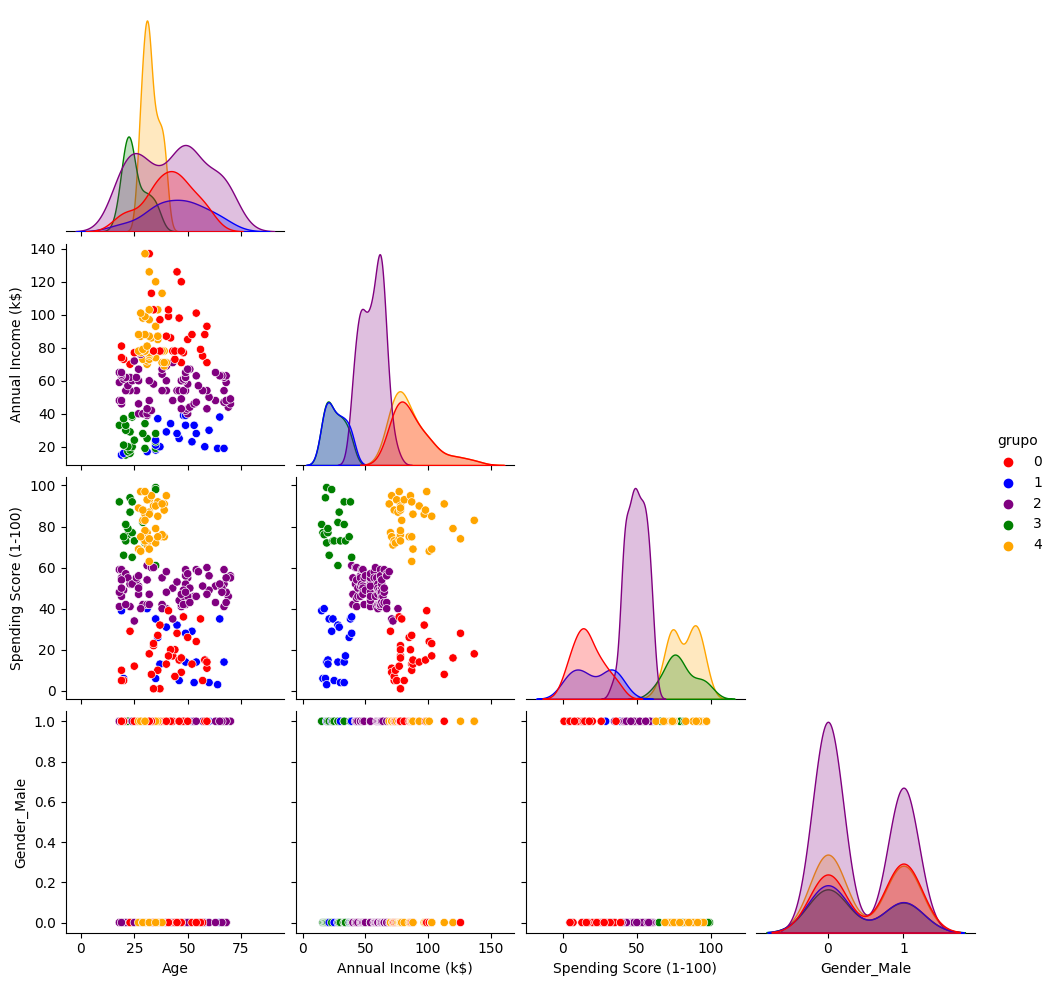

In [22]:
sns.pairplot(dfd, hue='grupo', corner=True, palette = ['red', 'blue', 'purple', 'green', 'orange'])

## PCA

For this exercise, we will use the same dataset, but we will first try to　・・sd reduce the number of dimensions and see how many clusters are created from them.

### Data organization and cleaning

For this particular case, we are interested in being able to transform the data.} Why? The data has very different values from each other, so we are interested in normalizing them in favor of better understanding their relationships.

In [23]:
X_clean = dfd.drop( ['grupo', 'Gender_Male'], axis=1 )

In [24]:
X_clean

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
transform = StandardScaler()

In [27]:
transform.fit( X_clean ) # genera las variables de ajuste

StandardScaler()

In [28]:
X_normalized = transform.transform(X_clean) # generamos la transformación

In [29]:
pd.DataFrame(X_normalized).describe()

,0,1,2
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


In [30]:
dfN = pd.DataFrame(X_normalized, columns=X_clean.columns)
dfN['Gender_Male'] = dfd['Gender_Male']
dfN

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components=2)

In [33]:
pca.fit(dfN)

PCA(n_components=2)

In [34]:
X = pca.transform( dfN )

### Exploratory Data Analysis

In [35]:
pca_df = pd.DataFrame(X)

<Axes: >

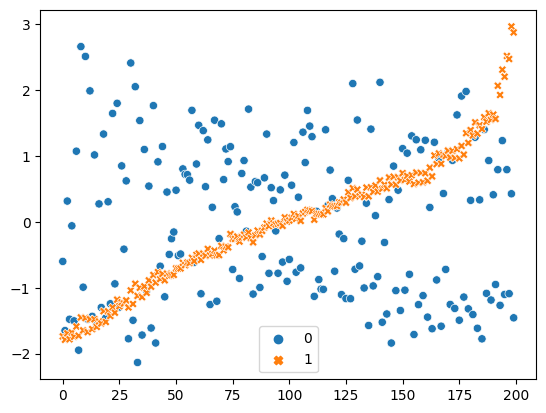

In [36]:
sns.scatterplot( data=pca_df )

In [37]:
pca.components_

array([[ 0.70603307, -0.04460546, -0.70578574,  0.03733834],
       [ 0.02677853,  0.99827635, -0.03421569,  0.03945288]])

<Axes: >

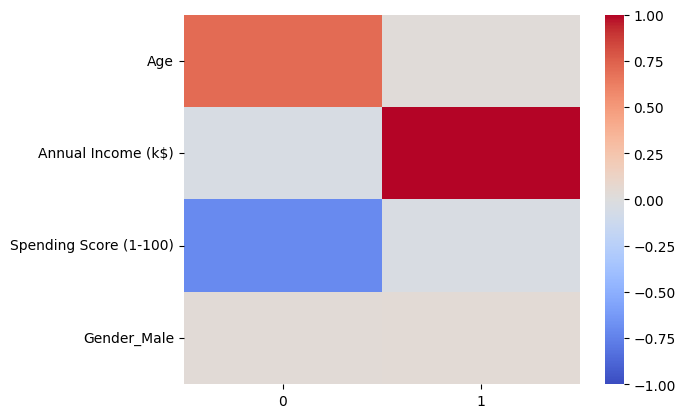

In [38]:
componentes = pd.DataFrame( pca.components_, columns=dfN.columns)
sns.heatmap(componentes.T, cmap='coolwarm', vmin=-1, vmax=1)

### Data interpretation
 
*   One of the main components was created solely from Annual Income
*   The other is a combination of Age and spending score. It indicates that the higher the age, the lower the spending.

<Axes: >

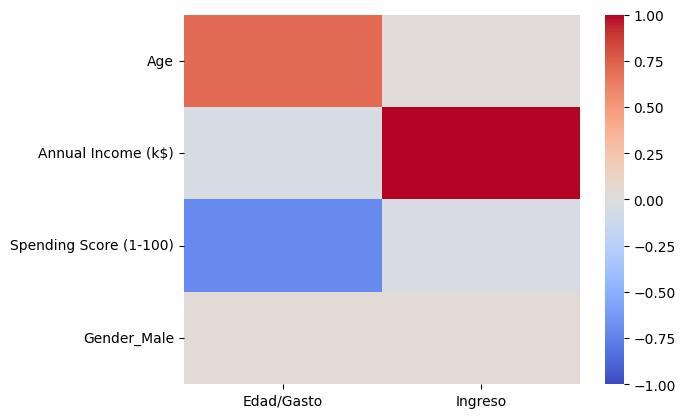

In [39]:
componentes.index = ['Edad/Gasto', 'Ingreso']
sns.heatmap(componentes.T, cmap='coolwarm', vmin=-1, vmax=1)

### Model Creation

We will use the “Elbow's Method” method to find the most optimal groups.

In [40]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

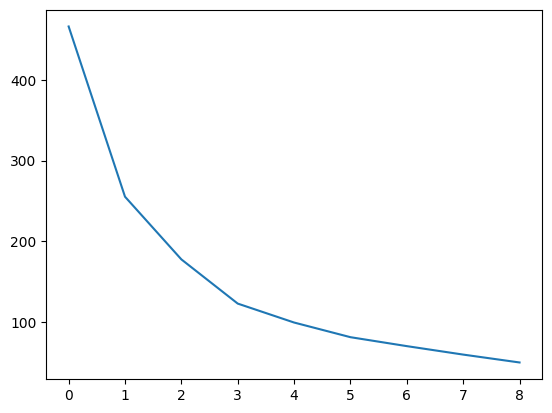

In [41]:
innertia = []

for i in range( 1, 10 ):
  local_km = KMeans( i )
  local_km.fit( pca_df )
  innertia.append( local_km.inertia_ )

plt.plot(innertia)

We can observe that the value in which it no longer decreases much is from 3, let’s see how the data looks like.

In [42]:
final_km = KMeans(3)
final_km.fit( pca_df )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [43]:
grupo = final_km.predict( pca_df )

In [44]:
pca_df.columns = ['Edad/Gasto','Ingreso']
pca_df

,Edad/Gasto,Ingreso
0,-0.600438,-1.737179
1,-1.649886,-1.789124
2,0.315381,-1.692772
3,-1.477989,-1.781317
4,-0.060545,-1.678691
...,...,...
195,-1.101819,2.201867
196,0.792047,2.517450
197,-1.089706,2.470818
198,0.425949,2.964343


In [45]:
pca_df['grupo'] = grupo

<Axes: xlabel='Edad/Gasto', ylabel='Ingreso'>

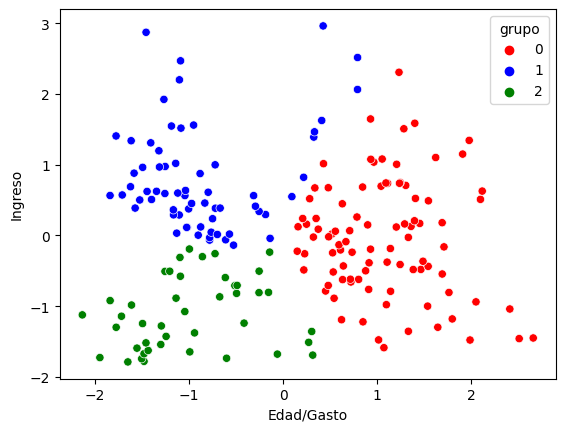

In [46]:
sns.scatterplot(
    x = pca_df['Edad/Gasto'],
    y = pca_df['Ingreso'], 
    hue=pca_df['grupo'],
    palette=['red', 'blue', 'green']
)

### Results

From the analysis and calculation of the PCA, we can argue that:



*   There is a group that spends a lot and earns a lot of money (0)
*   There is a group that spends a lot and earns little money (1)
*   There is a group that spends little, regardless of their income. (2)


Les pondremos nombre


*   0 - High Risk
*   1 - Desirable
*   2 - Conservative




In [ ]:
dfd['grupo'] = pca_df['grupo']

In [47]:
dfd['categoria'] = dfd['grupo'].apply(lambda x: 'Deseable' if x==0 else 'Conservadores' if x==1 else 'Alto riesgo')

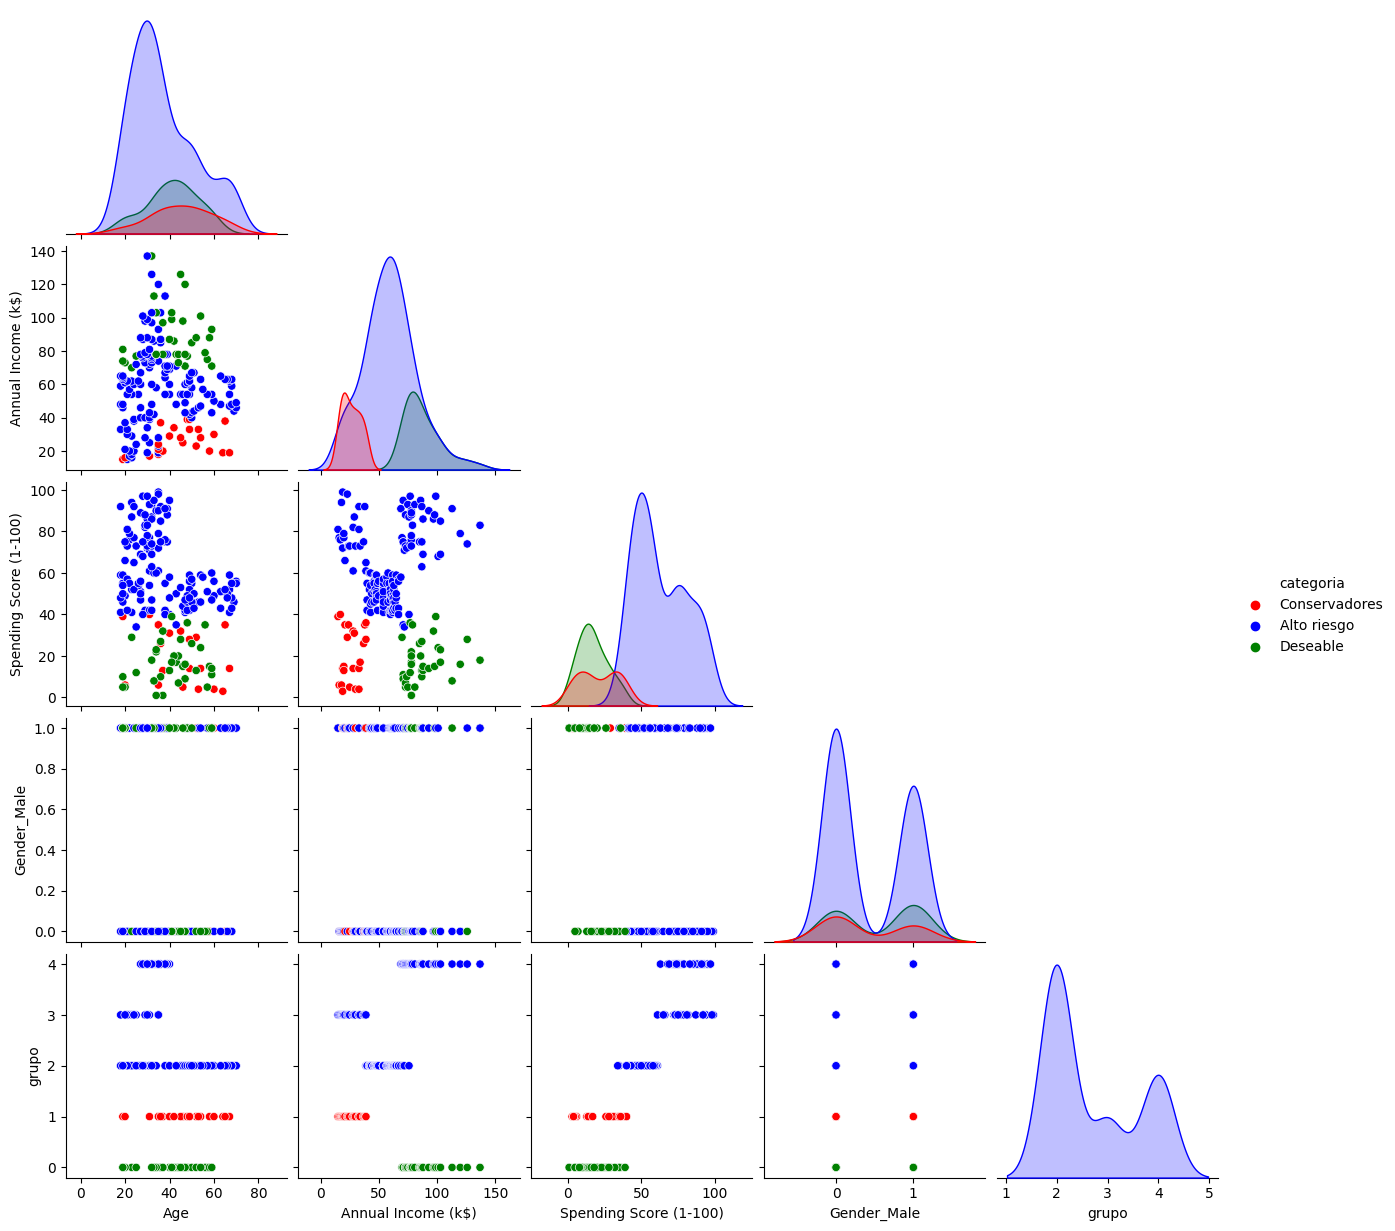

In [48]:
sns.pairplot(dfd, hue='categoria', corner=True, palette = ['red', 'blue', 'green'])